In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.cluster import DBSCAN

In [ ]:
# preprocessing

# Cargar datos desde el archivo Excel
datos = pd.read_excel('data/PANEL_SALUD_Y_SERVICIOS.xlsx')

# Renombrar las columnas del DataFrame para eliminar caracteres especiales
datos.rename(columns={
    'C�digo DANE del Municipio': 'Codigo_dane_del_municipio',
    'A�o': 'Ano',
    'N�mero de personas afiliadas al r�gimen subsidiado': 'Afiliados_Regimen_Subsidiado',
    'Cobertura personas afiliadas al r�gimen subsidiado': 'Cobertura_Regimen_Subsidiado',
    'N�mero de personas afiliadas al r�gimen contributivo': 'Afiliados_Regimen_Contributivo',
    'N�mero de personas que pertenecen a r�gimen especial de salud': 'Afiliados_Regimen_Especial',
    'N�mero de nacidos vivos totales': 'Nacidos_Vivos_Totales',
    'N�mero de nacidos vivos con un peso menor a 2500 gramos': 'Nacidos_Vivos_Menor_2500g',
    'N�mero de defunciones totales': 'Defunciones_Totales',
    'N�mero de defunciones de menores de 1 a�o': 'Defunciones_Menores_1_Ano',
    'N�mero de defunciones de ni�os entre 1 y 4 a�os': 'Defunciones_1_4_Ano',
    'Tasa Mortalidad Infantil': 'Tasa_Mortalidad_Infantil',
    'N�mero de prestadoras de servicio de salud p�blica': 'Prestadoras_Salud_Publica',
    'N�mero de sedes de prestadoras de servicio de salud p�blica': 'Sedes_Salud_Publica',
    'Cobertura total de acueducto': 'Cobertura_Acueducto_Total',
    'Cobertura total en �rea urbana de acueducto': 'Cobertura_Acueducto_Urbana',
    'Cobertura total en �rea rural de acueducto': 'Cobertura_Acueducto_Rural',
    'Cobertura total de aseo': 'Cobertura_Aseo_Total',
    'Cobertura total en �rea urbana de aseo': 'Cobertura_Aseo_Urbana',
    'Cobertura total en �rea rural de aseo': 'Cobertura_Aseo_Rural',
    'Cobertura total de alcantarillado': 'Cobertura_Alcantarillado_Total',
    'Cobertura total en �rea urbana de alcantarillado': 'Cobertura_Alcantarillado_Urbana',
    'Cobertura total en �rea rural de alcantarillado': 'Cobertura_Alcantarillado_Rural',
    'Usuarios de energ�a el�ctrica en la cabecera municipal conectados al Sistema ': 'Usuarios_Energia_Cabecera_Conectados_SIN',
    'Usuarios de energ�a el�ctrica no en la cabecera municipal conectados al Siste': 'Usuarios_Energia_No_Cabecera_Conectados_SIN',
    'Usuarios de energ�a el�ctrica conectados al Sistema Interconectado Nacional': 'Usuarios_Energia_Conectados_SIN',
    'Usuarios de energ�a el�ctrica en la cabecera municipal en Zona no Interconect': 'Usuarios_Energia_Cabecera_Zona_No_Interconectada',
    'Usuarios de energ�a el�ctrica no en la cabecera municipal en Zona no Intercon': 'Usuarios_Energia_No_Cabecera_Zona_No_Interconectada',
    'Usuarios de energ�a el�ctrica en Zona no Interconectada': 'Usuarios_Energia_Zona_No_Interconectada',
    'Usuarios de energ�a el�ctrica en la cabecera municipal': 'Usuarios_Energia_Cabecera',
    'Usuarios de energ�a el�ctrica no en la cabecera municipal': 'Usuarios_Energia_No_Cabecera',
    'Total usuarios de energ�a el�ctrica': 'Total_Usuarios_Energia',
    'Usuarios de energ�a el�ctrica subnormales conectados al Sistema Interconectad': 'Usuarios_Energia_Subnormales_Conectados_SIN',
    'Indice de cobertura el�ctrica en la cabecera municipal': 'Indice_Cobertura_Electrica_Cabecera',
    'Indice de cobertura el�ctrica no en la cabecera municipal': 'Indice_Cobertura_Electrica_No_Cabecera',
    'Indice de cobertura el�ctrica': 'Indice_Cobertura_Electrica',
    'Registro estatal de inmuebles': 'Registro_Estatal_Inmuebles',
    'Usuarios anillados a la red de gas natural': 'Usuarios_Anillados_Gas_Natural',
    'Usuarios residenciales conectados a la red de gas natural': 'Usuarios_Residenciales_Conectados_Gas_Natural',
    'Total de usuarios conectados a la red de gas natural': 'Total_Usuarios_Conectados_Gas_Natural',
    'Cobertura potencial de gas natural': 'Cobertura_Potencial_Gas_Natural',
    'Cobertura efectiva de gas natural': 'Cobertura_Efectiva_Gas_Natural'
}, inplace=True)


In [ ]:
datos.columns

Index(['Codigo_dane_del_municipio', 'Ano', 'Afiliados_Regimen_Subsidiado',
       'Cobertura_Regimen_Subsidiado', 'Afiliados_Regimen_Contributivo',
       'Afiliados_Regimen_Especial', 'Nacidos_Vivos_Totales',
       'Nacidos_Vivos_Menor_2500g', 'Defunciones_Totales',
       'Defunciones_Menores_1_Ano', 'Defunciones_1_4_Ano',
       'Tasa_Mortalidad_Infantil', 'Prestadoras_Salud_Publica',
       'Sedes_Salud_Publica', 'Cobertura_Acueducto_Total',
       'Cobertura_Acueducto_Urbana', 'Cobertura_Acueducto_Rural',
       'Cobertura_Aseo_Total', 'Cobertura_Aseo_Urbana', 'Cobertura_Aseo_Rural',
       'Cobertura_Alcantarillado_Total', 'Cobertura_Alcantarillado_Urbana',
       'Cobertura_Alcantarillado_Rural',
       'Usuarios_Energia_Cabecera_Conectados_SIN',
       'Usuarios_Energia_No_Cabecera_Conectados_SIN',
       'Usuarios_Energia_Conectados_SIN',
       'Usuarios_Energia_Cabecera_Zona_No_Interconectada',
       'Usuarios_Energia_No_Cabecera_Zona_No_Interconectada',
       'Usuarios_E

In [ ]:
cobertura_columns = [col for col in datos.columns if col.startswith('Cobertura')]

cobertura_stats = datos[cobertura_columns].describe()
cobertura_stats

,Cobertura_Regimen_Subsidiado,Cobertura_Acueducto_Total,Cobertura_Acueducto_Urbana,Cobertura_Acueducto_Rural,Cobertura_Aseo_Total,Cobertura_Aseo_Urbana,Cobertura_Aseo_Rural,Cobertura_Alcantarillado_Total,Cobertura_Alcantarillado_Urbana,Cobertura_Alcantarillado_Rural,Cobertura_Potencial_Gas_Natural,Cobertura_Efectiva_Gas_Natural
count,20936.000000,10391.000000,10391.000000,10391.000000,9293.000000,9293.000000,9293.000000,10391.000000,10391.000000,10391.000000,5206.000000,5206.000000
mean,0.889407,59.040557,83.718009,36.435894,45.008191,79.860396,15.315310,40.602562,75.013455,12.891793,89.254990,70.502007
std,0.282067,30.349506,25.140655,37.048641,30.522410,27.975329,28.890621,30.065353,32.140062,25.586621,45.973456,52.378305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.730430,33.380000,74.655000,0.040000,19.580000,68.020000,0.000000,15.768377,61.115000,0.000000,82.529690,54.146544
50%,0.963107,59.003690,98.010000,24.450000,38.350000,94.360000,0.210000,33.980000,90.883191,0.330000,94.770813,74.160255
75%,1.000000,87.857910,100.000000,68.310000,67.740000,100.000000,14.980000,62.069483,100.000000,11.615000,99.469025,87.273790
max,3.129962,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2685.935547,3009.715820


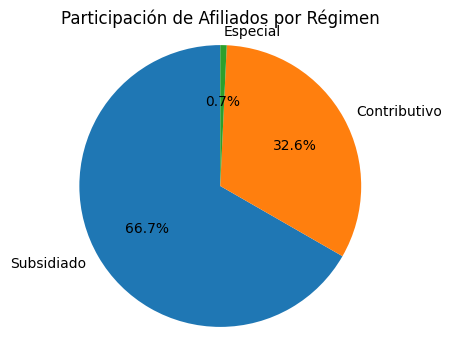

In [ ]:
afiliados_columns = [
    'Afiliados_Regimen_Subsidiado',
    'Afiliados_Regimen_Contributivo',
    'Afiliados_Regimen_Especial'
]

# Sumar los valores de afiliados
afiliados_sums = datos[afiliados_columns].sum()
afiliados_sums.index = ['Subsidiado', 'Contributivo', 'Especial']

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(afiliados_sums, labels=afiliados_sums.index, autopct='%1.1f%%', startangle=90)
plt.title('Participación de Afiliados por Régimen')
plt.axis('equal')
plt.show()

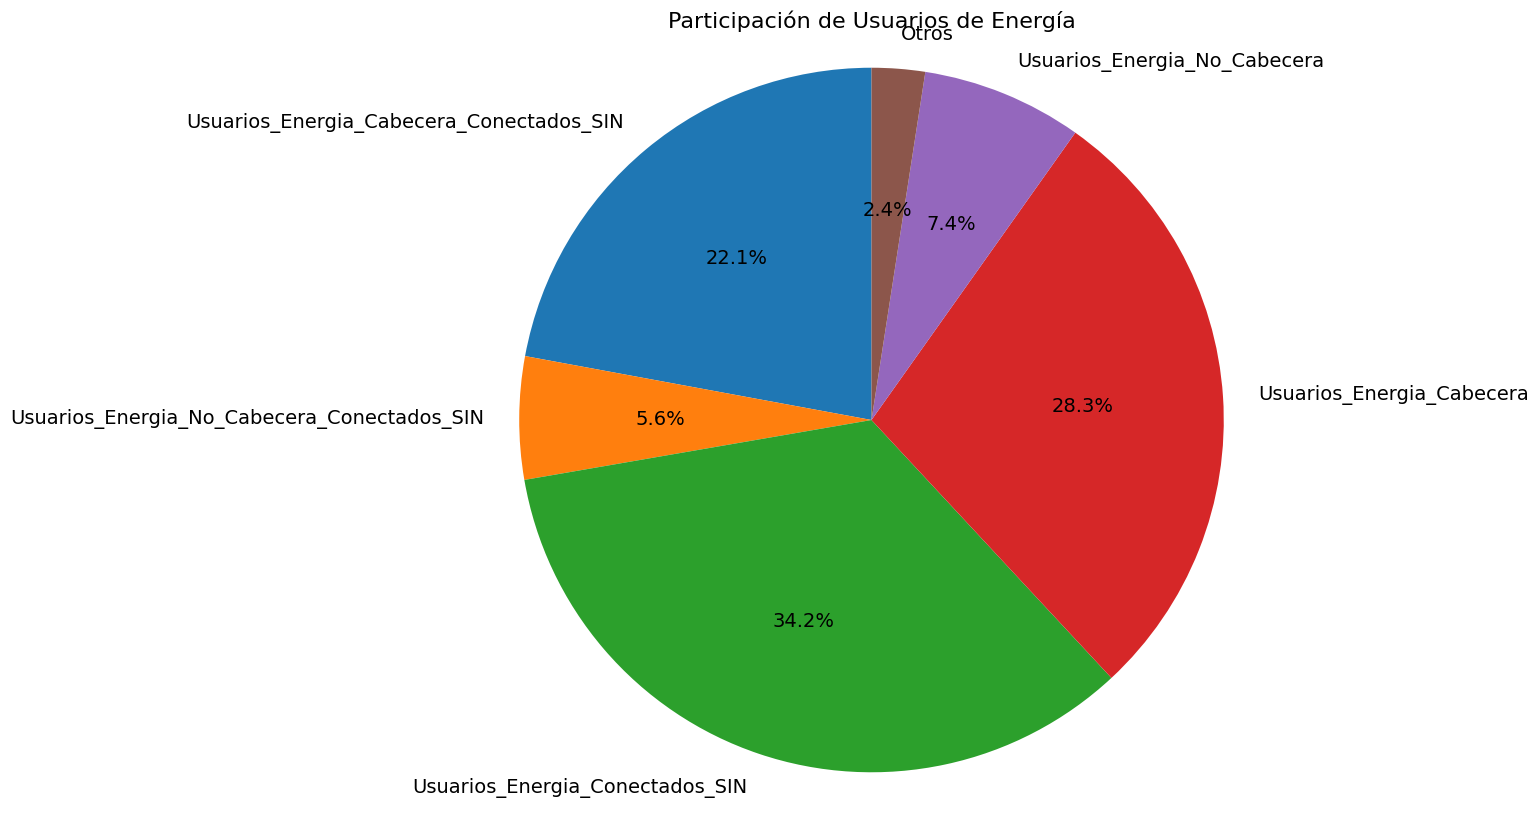

In [ ]:
# Filtrar las columnas que contienen la palabra 'Usuarios_Energia' en el nombre
energia_columns_filtered = [col for col in datos.columns if 'Usuarios_Energia' in col]

# Excluir la columna "Total usuarios de energía eléctrica" de las variables seleccionadas
energia_columns_filtered = [col for col in energia_columns_filtered if 'Total' not in col]

# Sumar los valores totales de las variables de energía filtradas
energia_totales_filtered = datos[energia_columns_filtered].sum()

# Calcular la proporción en porcentajes
energia_totales_percentage = (energia_totales_filtered / energia_totales_filtered.sum()) * 100

# Agrupar las categorías que tienen menos del 1% en una categoría llamada "Otros"
energia_agrupada = energia_totales_percentage.copy()
otros = energia_agrupada[energia_agrupada < 3].sum()
energia_agrupada = energia_agrupada[energia_agrupada >= 3]
energia_agrupada['Otros'] = otros

# Crear un gráfico de torta con la categoría "Otros" incluida
plt.figure(figsize=(10, 10))
plt.pie(energia_agrupada, labels=energia_agrupada.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Participación de Usuarios de Energía', fontsize=16)
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

In [ ]:
datos["Ano"].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [ ]:
# Contar la cantidad de registros por año
conteo_por_ano = datos['Ano'].value_counts().sort_index()

# Mostrar el conteo de registros por año
print(conteo_por_ano)

Ano
1998    1150
1999    1155
2000    1155
2001    1159
2002    1161
2003    1162
2004    1165
2005    1168
2006    1168
2007    1169
2008    1182
2009    1194
2010    1201
2011    1198
2012    1195
2013    1195
2014    1188
2015    1192
2016    1126
Name: count, dtype: int64


In [ ]:
# Filtrar por el año más reciente
datos = datos[datos['Ano'] >= 2011]

# Eliminar columnas innecesarias como el identificador y año
#datos = datos.drop(columns=['Codigo_dane_del_municipio', 'Ano'])

In [ ]:
# Identificar columnas numéricas para la estandarización
numerical_columns = datos.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numéricas identificadas para la estandarización:")
print(numerical_columns)

# Aplicar KNN para la imputación de los valores faltantes
imputer = KNNImputer(n_neighbors=5)  # KNN con k=5 vecinos
datos[numerical_columns] = imputer.fit_transform(datos[numerical_columns])

# Estandarizar las variables numéricas
scaler = StandardScaler()
datos[numerical_columns] = scaler.fit_transform(datos[numerical_columns])

# Guardar los datos preprocesados en un archivo CSV
datos.to_csv('data/processed_data.csv', index=False)

print("Preprocesamiento completado y datos guardados en 'data/processed_data.csv'")

Columnas numéricas identificadas para la estandarización:
Index(['Codigo_dane_del_municipio', 'Ano', 'Afiliados_Regimen_Subsidiado',
       'Cobertura_Regimen_Subsidiado', 'Afiliados_Regimen_Contributivo',
       'Afiliados_Regimen_Especial', 'Nacidos_Vivos_Totales',
       'Nacidos_Vivos_Menor_2500g', 'Defunciones_Totales',
       'Defunciones_Menores_1_Ano', 'Defunciones_1_4_Ano',
       'Tasa_Mortalidad_Infantil', 'Prestadoras_Salud_Publica',
       'Sedes_Salud_Publica', 'Cobertura_Acueducto_Total',
       'Cobertura_Acueducto_Urbana', 'Cobertura_Acueducto_Rural',
       'Cobertura_Aseo_Total', 'Cobertura_Aseo_Urbana', 'Cobertura_Aseo_Rural',
       'Cobertura_Alcantarillado_Total', 'Cobertura_Alcantarillado_Urbana',
       'Cobertura_Alcantarillado_Rural',
       'Usuarios_Energia_Cabecera_Conectados_SIN',
       'Usuarios_Energia_No_Cabecera_Conectados_SIN',
       'Usuarios_Energia_Conectados_SIN',
       'Usuarios_Energia_Cabecera_Zona_No_Interconectada',
       'Usuarios_Energ

In [ ]:
# Contar la cantidad de registros por año
conteo_por_ano = datos['Ano'].value_counts().sort_index()

# Mostrar el conteo de registros por año
print(conteo_por_ano)

Ano
-1.455537    1198
-0.867084    1195
-0.278632    1195
 0.309821    1188
 0.898274    1192
 1.486726    1126
Name: count, dtype: int64


In [ ]:
!pip install kneed

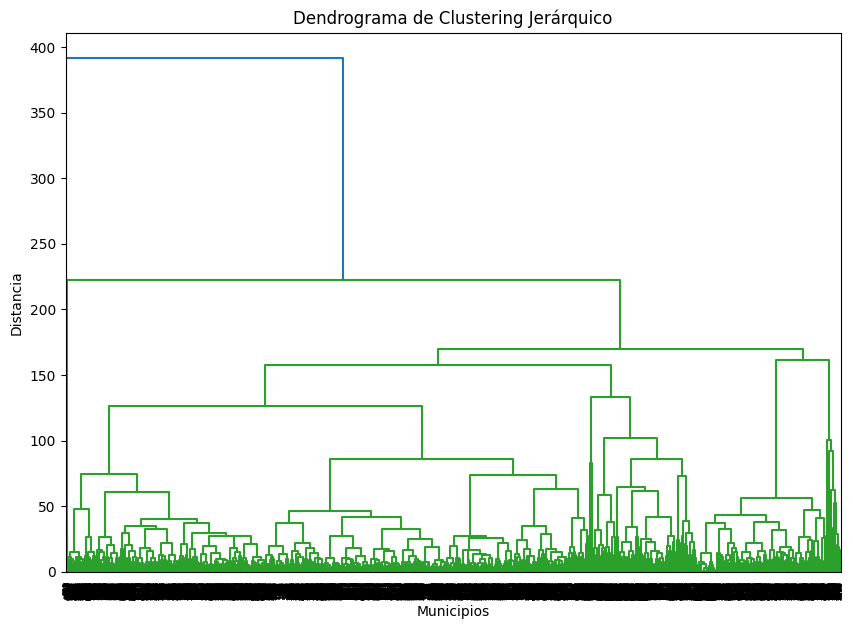

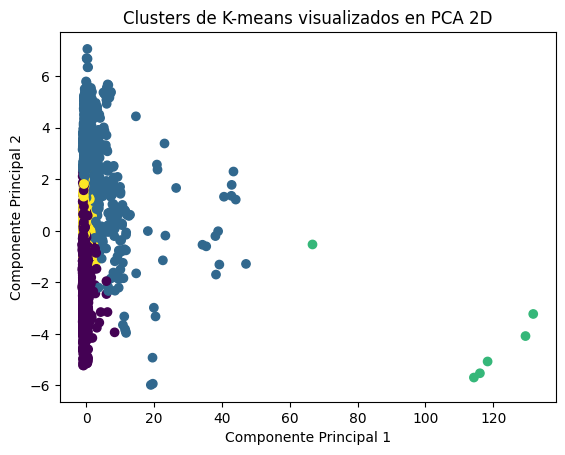

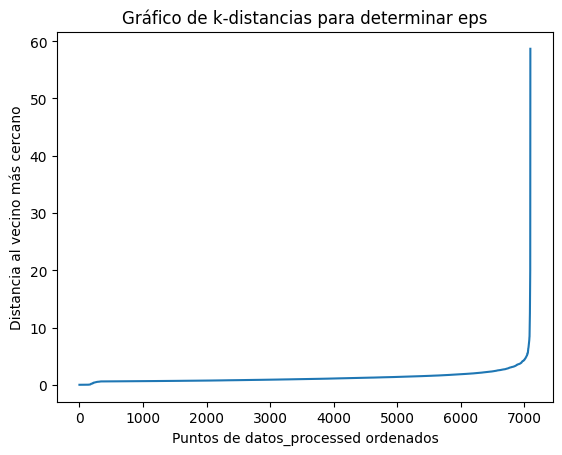

Valor óptimo de eps encontrado: 5.600519024515108


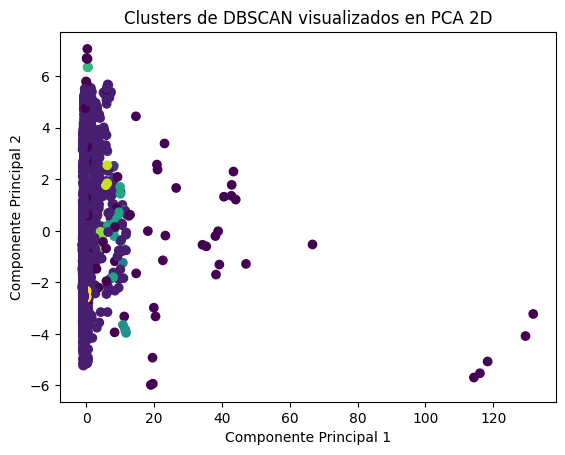

Análisis de clustering completado y resultados guardados en 'results/'


In [ ]:
# Cargar datos_processed preprocesados
datos_processed = pd.read_csv('data/processed_data.csv')

# Columnas numéricas para clustering (se asumen todas como numéricas en el archivo preprocesado)
numerical_columns = datos_processed.select_dtypes(include=['float64', 'int64']).columns

# Clustering jerárquico
Z = linkage(datos_processed[numerical_columns], method='ward')

# Guardar el dendrograma en un archivo
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Municipios')
plt.ylabel('Distancia')
plt.savefig('results/dendrogram.png')
plt.show()
plt.close()

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajusta el número de clusters según sea necesario
datos_processed['KMeans_Cluster'] = kmeans.fit_predict(datos_processed[numerical_columns])

# Visualizar y guardar los clusters de K-means en un PCA de 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datos_processed[numerical_columns])
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=datos_processed['KMeans_Cluster'])
plt.title('Clusters de K-means visualizados en PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.savefig('results/kmeans_clusters.png')
plt.show()
plt.close()

# DBSCAN
# Determinar eps óptimo usando el método de la rodilla
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(datos_processed[numerical_columns])
distances, indices = nbrs.kneighbors(datos_processed[numerical_columns])
distances = np.sort(distances, axis=0)[:, 1]

# Graficar el gráfico de k-distancias para encontrar eps
plt.plot(distances)
plt.title('Gráfico de k-distancias para determinar eps')
plt.xlabel('Puntos de datos_processed ordenados')
plt.ylabel('Distancia al vecino más cercano')
plt.savefig('results/kdistances.png')
plt.show()
plt.close()

# Encontrar el punto de "codo"
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
eps_optimo = distances[kneedle.knee]
print(f"Valor óptimo de eps encontrado: {eps_optimo}")

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps_optimo, min_samples=4)
datos_processed['DBSCAN_Cluster'] = dbscan.fit_predict(datos_processed[numerical_columns])

# Guardar visualización de los clusters de DBSCAN
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=datos_processed['DBSCAN_Cluster'])
plt.title('Clusters de DBSCAN visualizados en PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.savefig('results/dbscan_clusters.png')
plt.show()
plt.close()

# Guardar resultados en un archivo CSV
datos_processed.to_csv('results/clustered_data.csv', index=False)

print("Análisis de clustering completado y resultados guardados en 'results/'")

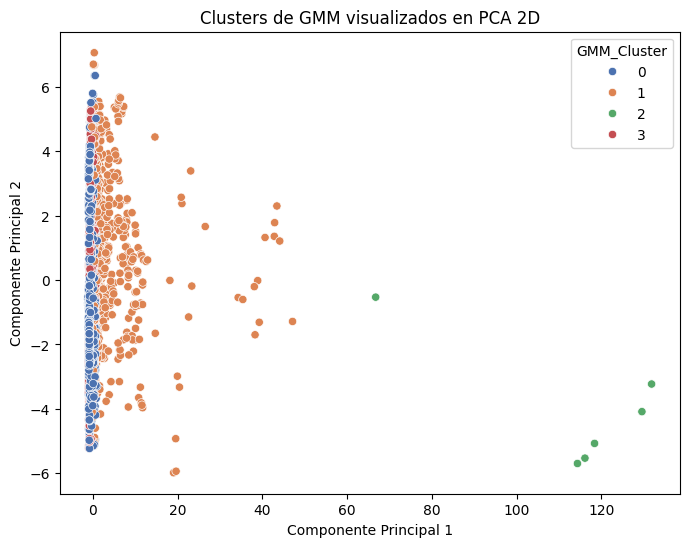

Análisis con GMM completado y guardado en 'results/gmm_clustered_data.csv'


In [ ]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure datos_processed already includes previous clustering results
# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
datos_processed['GMM_Cluster'] = gmm.fit_predict(datos_processed[numerical_columns])

# Visualize the GMM clusters using PCA in 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datos_processed[numerical_columns])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=datos_processed['GMM_Cluster'], palette='deep')
plt.title('Clusters de GMM visualizados en PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.savefig('results/gmm_clusters.png')
plt.show()
plt.close()

# Save the updated DataFrame including GMM clusters
datos_processed.to_csv('results/gmm_clustered_data.csv', index=False)
print("Análisis con GMM completado y guardado en 'results/gmm_clustered_data.csv'")


#DBSCAN

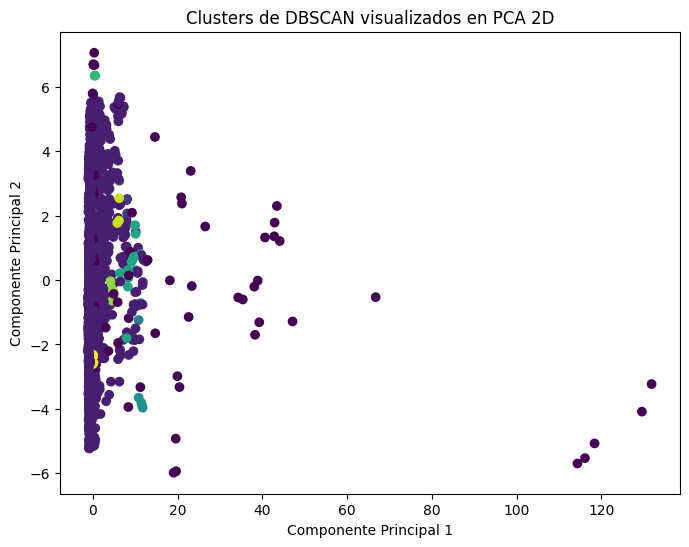

Análisis de DBSCAN completado y guardado en 'results/dbscan_clustered_data.csv'


In [ ]:
from sklearn.cluster import DBSCAN

# Ensure datos_processed is loaded with the latest clustering information (e.g., including GMM clusters)
# Apply DBSCAN with the optimum value of eps
dbscan = DBSCAN(eps=eps_optimo, min_samples=4)
datos_processed['DBSCAN_Cluster'] = dbscan.fit_predict(datos_processed[numerical_columns])

# Visualize the DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=datos_processed['DBSCAN_Cluster'], cmap='viridis')
plt.title('Clusters de DBSCAN visualizados en PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.savefig('results/dbscan_clusters_final.png')
plt.show()
plt.close()

# Save the results with DBSCAN clusters
datos_processed.to_csv('results/dbscan_clustered_data.csv', index=False)
print("Análisis de DBSCAN completado y guardado en 'results/dbscan_clustered_data.csv'")


In [ ]:
# Counts for K-means Clusters
kmeans_counts = datos_processed['KMeans_Cluster'].value_counts()
print("Count of data points per K-means cluster:")
print(kmeans_counts)

# Counts for DBSCAN Clusters
dbscan_counts = datos_processed['DBSCAN_Cluster'].value_counts()
print("Count of data points per DBSCAN cluster:")
print(dbscan_counts)

# Assuming GMM results were saved correctly and loaded
gmm_data = pd.read_csv('results/gmm_clustered_data.csv')
gmm_counts = gmm_data['GMM_Cluster'].value_counts()
print("Count of data points per GMM cluster:")
print(gmm_counts)

Count of data points per K-means cluster:
KMeans_Cluster
3    4139
0    1660
1    1289
2       6
Name: count, dtype: int64
Count of data points per DBSCAN cluster:
DBSCAN_Cluster
 0     6963
-1       77
 6       11
 8        6
 1        5
 4        5
 11       5
 3        4
 10       4
 5        4
 7        4
 9        4
 2        2
Name: count, dtype: int64
Count of data points per GMM cluster:
GMM_Cluster
3    4799
0    1508
1     781
2       6
Name: count, dtype: int64


In [ ]:
datos_processed.columns

Index(['Codigo_dane_del_municipio', 'Ano', 'Afiliados_Regimen_Subsidiado',
       'Cobertura_Regimen_Subsidiado', 'Afiliados_Regimen_Contributivo',
       'Afiliados_Regimen_Especial', 'Nacidos_Vivos_Totales',
       'Nacidos_Vivos_Menor_2500g', 'Defunciones_Totales',
       'Defunciones_Menores_1_Ano', 'Defunciones_1_4_Ano',
       'Tasa_Mortalidad_Infantil', 'Prestadoras_Salud_Publica',
       'Sedes_Salud_Publica', 'Cobertura_Acueducto_Total',
       'Cobertura_Acueducto_Urbana', 'Cobertura_Acueducto_Rural',
       'Cobertura_Aseo_Total', 'Cobertura_Aseo_Urbana', 'Cobertura_Aseo_Rural',
       'Cobertura_Alcantarillado_Total', 'Cobertura_Alcantarillado_Urbana',
       'Cobertura_Alcantarillado_Rural',
       'Usuarios_Energia_Cabecera_Conectados_SIN',
       'Usuarios_Energia_No_Cabecera_Conectados_SIN',
       'Usuarios_Energia_Conectados_SIN',
       'Usuarios_Energia_Cabecera_Zona_No_Interconectada',
       'Usuarios_Energia_No_Cabecera_Zona_No_Interconectada',
       'Usuarios_E

In [ ]:
# Seleccionar las columnas de interés
columns_of_interest = [
    'Afiliados_Regimen_Subsidiado', 'Cobertura_Regimen_Subsidiado', 'Afiliados_Regimen_Contributivo',
    'Nacidos_Vivos_Totales', 'Defunciones_Totales', 'Tasa_Mortalidad_Infantil',
    'Cobertura_Acueducto_Total', 'Cobertura_Aseo_Total', 'Cobertura_Alcantarillado_Total',
    'Usuarios_Energia_Conectados_SIN', 'Total_Usuarios_Energia'
]

# Generar estadísticas descriptivas para cada clúster de KMeans
kmeans_stats = datos_processed.groupby('KMeans_Cluster')[columns_of_interest].describe()

# Generar estadísticas descriptivas para cada clúster de DBSCAN
dbscan_stats = datos_processed.groupby('DBSCAN_Cluster')[columns_of_interest].describe()

# Generar estadísticas descriptivas para cada clúster de GMM
gmm_stats = datos_processed.groupby('GMM_Cluster')[columns_of_interest].describe()

# Imprimir las estadísticas para revisión
print("Estadísticas descriptivas por clúster de KMeans:\n", kmeans_stats)
print("\nEstadísticas descriptivas por clúster de DBSCAN:\n", dbscan_stats)
print("\nEstadísticas descriptivas por clúster de GMM:\n", gmm_stats)

Estadísticas descriptivas por clúster de KMeans:
                Afiliados_Regimen_Subsidiado                                  \
                                      count       mean       std        min   
KMeans_Cluster                                                                
0                                    1660.0  -0.075404  0.372070  -0.347613   
1                                    1289.0   0.472535  1.708432  -0.341326   
2                                       6.0  20.079791  4.644155  15.561207   
3                                    4139.0  -0.146027  0.215657  -0.349857   

                                                            \
                      25%        50%        75%        max   
KMeans_Cluster                                               
0               -0.270180  -0.188807  -0.011979   4.574252   
1               -0.209910  -0.122713   0.245461  12.810295   
2               15.961393  19.971277  24.096088  24.879196   
3               -0.27846